In [1]:
#Importando Bibliotecas

import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import numpy as np
import matplotlib.ticker as ticker
from numpy.random import randint
import math as Math
import matplotlib.dates as mdates
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
O codigo fonte por padrão está escondido,para visualizar clique > <a href="javascript:code_toggle()">aqui</a>.''')

In [5]:

#Lendo a api CSV de infectados 
df=pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv")
#Criando um novo DF somente com os dados BRAZIL
df2=df[df["Country/Region"]=="Brazil"]
df3= df2.copy()
#Deletando colunas que não são importantes
del df3["Lat"]
del df3["Long"]
del df3["Province/State"]

#Ordenando as colunas ,pois as datas estão como colunas e para fazer a analise 
# as datas teriam que ser linhas dentro de uma coluna chamada data
# e os valores que está em cada coluna com data se tornar linhas de uma nova coluna chamada value(nome que quiser)
df4=df3.melt(id_vars=["Country/Region"],
         var_name="Data" , value_name="Infectados")
df_brazil=df4.copy
#Renomeando o dado BRAZIL para Brasil
df4["Country/Region"] = df4["Country/Region"].str.replace("Brazil","Brasil")

#Removendo valores zerado
drop_mortes=df4.index[df4["Infectados"]==0].tolist()
c=drop_mortes
df4=df4.drop(df4.index[c])
#Trocando o nome em ingles para PAÍS
df4.rename(columns={"Country/Region":"País"}, inplace=True)
#Derrubando a primeira linha pois ela foi com sujeira
df4.drop(df4.index[0], inplace=True)
#Convertendo a coluna data para tipo DATA
df4["Data"]=pd.to_datetime(df4["Data"])
df4["Data"]=df4["Data"].dt.strftime("%d/%m/%Y")
#Convertendo infectados que estava como objeto para tipo data
df4["Infectados"] = df4["Infectados"].astype(int)
#Resetando o index paa pois estava 0 depos 57
df4.reset_index(inplace=True)
#Deletando a coluna index que foi criada
del df4["index"]
#Criando coluna porcentagem referente a coluna infectados , onde a porcentagem é referente ao valor above
df4["Porcentagem"]=df4["Infectados"].pct_change()
#Convertendo a coluna porcentagem para tipo float
df4["Porcentagem"] = df4["Porcentagem"].astype(float)
#Tinha um valor que estava com NaN , troquei para 0 afim de facilitar
df4.iloc[0,3]=0
#Formatando a exibição da coluna porcentagem
pd.options.display.float_format ="{:,.2f}%".format
#Formula  para poder exibir a porcentagem em numeros "inteiros", ex. 0.01 = 10%
df4["Porcentagem"]= df4['Porcentagem'].apply(lambda x: x*100) 

#API Mortes COVID
#Foram feitas as mesma coisas da api a cima
df_1=pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv")

df_2=df_1[df_1["Country/Region"]=="Brazil"]
df_3= df_2.copy()
del df_3["Lat"]
del df_3["Long"]
df_4=df_3.melt(id_vars=["Country/Region"],
         var_name="Data" , value_name="Mortes")
df_4["Country/Region"] = df_4["Country/Region"].str.replace("Brazil","Brasil")
# Clean 0 values from DataFrame
drop_mortes=df_4.index[df_4["Mortes"]==0].tolist()
c=drop_mortes
df_4=df_4.drop(df_4.index[c])
df_4.rename(columns={"Country/Region":"País"}, inplace=True)
df_4.drop(df_4.index[0], inplace=True)
df_4["Data"]=pd.to_datetime(df_4["Data"])
df_4["Data"]=df_4["Data"].dt.strftime("%d/%m/%Y")
df_4["Mortes"] = df_4["Mortes"].astype(int)
df_4.reset_index(inplace=True)
del df_4["index"]
df_4["Porcentagem"]=df_4["Mortes"].pct_change()
df_4["Porcentagem"] = df_4["Porcentagem"].astype(float)
df_4.iloc[0,3]=0
pd.options.display.float_format ="{:,.2f}%".format
df_4["Porcentagem"]= df_4['Porcentagem'].apply(lambda x: x*100) 

#Regra de crição de grafico:
def grafico_covid():
#Graficos morte
    e =df_4["Data"]
    z = df_4["Mortes"]
    max = df_4["Mortes"].max()
    plt1.figure(figsize=(10,11))
    plt1.plot(z,e,color="black",linewidth=5,markerfacecolor="red",markersize=7,marker="s")
    plt1.scatter(z,e)
    plt1.title(f"Dados de Mortos pelo COVID-19 No BRASIL:  Total de ={max:5.0f}", fontsize=15,fontweight="bold")
    plt1.xlabel(f"\n\nMortes",fontsize=15,fontweight="bold")
    plt1.xticks(z)
    plt1.yticks(e)
    plt1.xticks(rotation=15, fontsize=15)
    plt1.yticks(fontsize=15)
    plt1.ylabel("Dias               ", rotation=0,fontsize=15,fontweight="bold")
    plt1.xticks(rotation=0)
    for i, txt in enumerate(z):
        plt1.annotate(txt, (z[i], e[i]),ha='right',fontsize=25)
    plt1.grid()
    plt1.savefig('death.png') 
    plt1.show()
    
    #Grafico infectados
    x = df4["Infectados"]
    y = df4["Data"]
    max1=df4["Infectados"].max()
    plt.figure(figsize=(10,11)) # Referente ao tamanho do grafico
    plt.plot(y,x, color="black",linewidth=5,markerfacecolor="red",markersize=7,marker="s") # Informando as variaveis que serão utilizadas para representar o grafico
    plt.title(f"Infectados no Brasil: Total de ={max1:5.0f}", fontsize=15,fontweight="bold") # Titulo do grafico
    plt.xlabel("Dias em que se mantiveram o valor de infectados:", fontsize=15,fontweight="bold") # Titudo do eixo X
    plt.ylabel(f"Infectados                ",rotation=0, fontsize=15,fontweight="bold") #Titulo do eixo Y
    plt.xticks(y) # Define o ponto inicial do ticks 
    plt.xticks(rotation=65, fontsize=15) # Define a rotação da lengenda do indice X ,Define o tamanho de fonte dos indices X
    plt.yticks(fontsize=15)  # Define o tamanho da  fonte dos indices Y
    plt.grid() # Adicionar linhas guias no grafico
    plt.savefig('infectos_brasil.png') # Salvando em PNG o grafico ,lembrar de criar a pasta

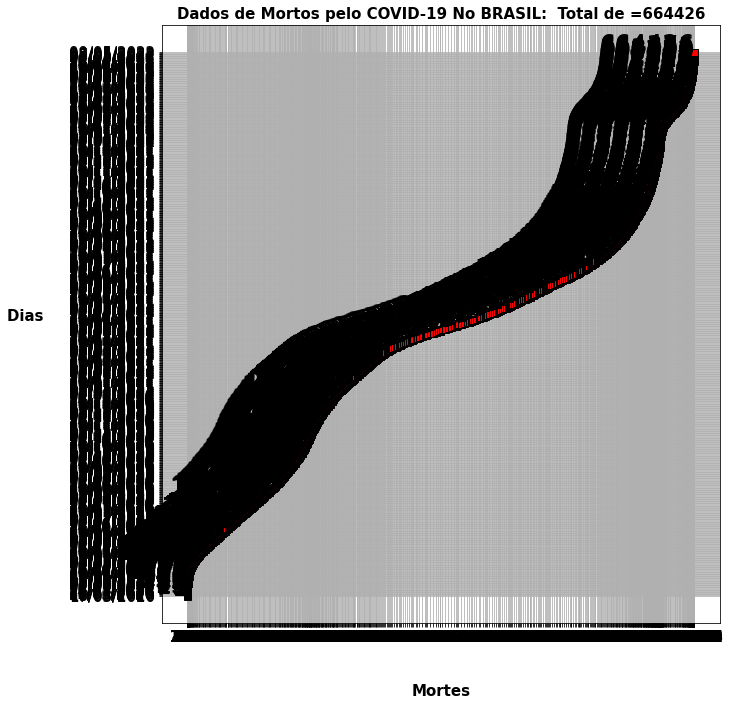

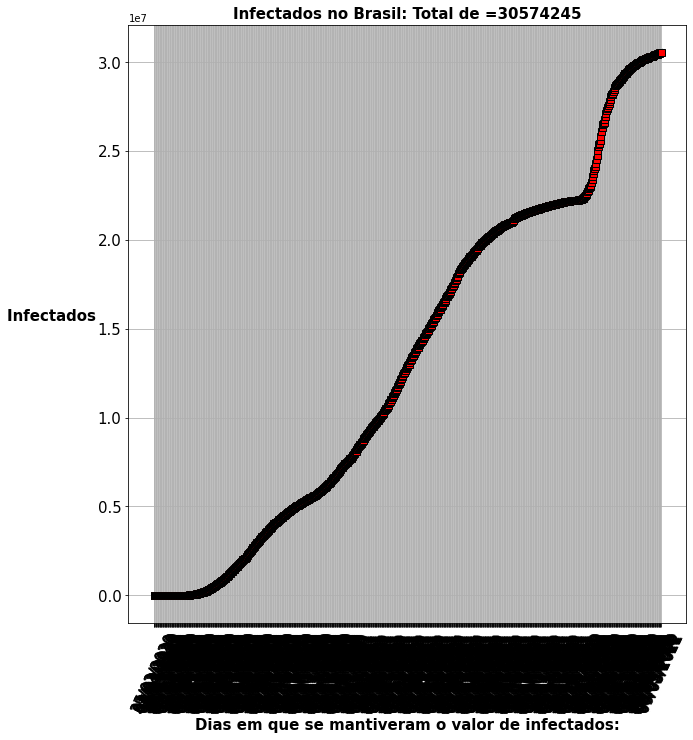

In [6]:
grafico_covid()

In [7]:
df_4.tail(50)

,País,Data,Mortes,Porcentagem
734,Brasil,21/03/2022,657595,0.02%
735,Brasil,22/03/2022,658005,0.06%
736,Brasil,23/03/2022,658286,0.04%
737,Brasil,24/03/2022,658600,0.05%
738,Brasil,25/03/2022,658855,0.04%
739,Brasil,26/03/2022,659046,0.03%
740,Brasil,27/03/2022,659159,0.02%
741,Brasil,28/03/2022,659227,0.01%
742,Brasil,29/03/2022,659508,0.04%
743,Brasil,30/03/2022,659769,0.04%


In [9]:
df4.head(50)

,País,Data,Infectados,Porcentagem
0,Brasil,27/02/2020,1,0.00%
1,Brasil,28/02/2020,1,0.00%
2,Brasil,29/02/2020,2,100.00%
3,Brasil,01/03/2020,2,0.00%
4,Brasil,02/03/2020,2,0.00%
5,Brasil,03/03/2020,2,0.00%
6,Brasil,04/03/2020,4,100.00%
7,Brasil,05/03/2020,4,0.00%
8,Brasil,06/03/2020,13,225.00%
9,Brasil,07/03/2020,13,0.00%
